# Imports

In [1]:
import os
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer

In [2]:
# Carregando as configurações do arquivo 'config_modelo.json'
configs = json.load(open('config_modelo.json', 'r'))

In [3]:
# Criar a pasta 'save_dir' caso não exista no diretório
if not os.path.exists(configs['model']['save_dir']):
            os.makedirs(configs['model']['save_dir'])

In [4]:
# Carregar o Dataset
filepath = 'C:/Users/auW10/Documents/CodigosDoAu/000_Doutorado/dataset/'
df = pd.read_pickle(filepath+'dataset_with_TI_ciclo1_multiclass_jupyter.pkl')
print(df.shape)
df.head(2)

(139882, 38)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,EMA_20,MIDPOINT_20,...,MES,DIA_SEMANA,HORA_NOBRE,TARGET_WIN,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL,TARGET_WIN_CAT_ENC,HOLD,SELL,BUY
0,2014-11-19 12:25:00,2014.11.19,12:25:00,53675.0,53780.0,53550.0,53560.0,7494.0,53259.250000,53367.5,...,11,2,2,-70.0,HOLD,2,1,1,0,0
1,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53273.607143,53367.5,...,11,2,2,15.0,HOLD,2,1,1,0,0


## Split dos Dados

In [5]:
df.columns.tolist()

['DATETIME',
 'DATE',
 'TIME',
 'OPEN',
 'HIGH',
 'LOW',
 'CLOSE',
 'VOL',
 'EMA_20',
 'MIDPOINT_20',
 'SAR_2',
 'SAR_6',
 'TRIMA_10',
 'ADX_6',
 'APO_5_12',
 'BOP',
 'CCI_12',
 'MFI_6',
 'MOM_6',
 'PPO_12_20',
 'ROC_5',
 'RSI_10',
 'TRIX_5',
 'AD',
 'ADOSC',
 'OBV',
 'ATR_12',
 'TRANGE',
 'MES',
 'DIA_SEMANA',
 'HORA_NOBRE',
 'TARGET_WIN',
 'TARGET_WIN_CAT3',
 'TARGET_WIN_CAT3_LABEL',
 'TARGET_WIN_CAT_ENC',
 'HOLD',
 'SELL',
 'BUY']

In [6]:
print(df.shape)
df2 = df.drop([  'MES',
                 'DIA_SEMANA', 
                 'TARGET_WIN',
                 
                 'TARGET_WIN_CAT_ENC',
             
                 'HOLD',
                 'SELL',
                 'BUY'
               
              ], axis=1)
print(df2.shape)
df2.head(2)

(139882, 38)
(139882, 31)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,EMA_20,MIDPOINT_20,...,RSI_10,TRIX_5,AD,ADOSC,OBV,ATR_12,TRANGE,HORA_NOBRE,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL
0,2014-11-19 12:25:00,2014.11.19,12:25:00,53675.0,53780.0,53550.0,53560.0,7494.0,53259.250000,53367.5,...,68.670278,0.080760,7762.234724,3987.430068,25358.0,130.723615,230.0,2,HOLD,2
1,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53273.607143,53367.5,...,56.517372,0.071464,-78.077776,224.882410,16995.0,133.163314,160.0,2,HOLD,2


In [7]:
'''
             'MIDPOINT_20',
             'SAR_2',
             'SAR_6', 
             'CCI_12',
             'PPO_12_20',
             'AD',
             'ADOSC',
             'TRIX_5',
             'ROC_5',
             'APO_5_12',
'''

"\n             'MIDPOINT_20',\n             'SAR_2',\n             'SAR_6', \n             'CCI_12',\n             'PPO_12_20',\n             'AD',\n             'ADOSC',\n             'TRIX_5',\n             'ROC_5',\n             'APO_5_12',\n"

In [8]:
df_train = df2[(df2['DATETIME'] >= '2014-01-01') & (df2['DATETIME'] < '2018-01-01')]
#df_train = df_train.iloc[-10000:, :]
df_valid = df2[(df2['DATETIME'] >= '2018-01-01') & (df2['DATETIME'] < '2019-01-01')]
#df_valid = df_valid.iloc[:6600, :]
df_test  = df2[(df2['DATETIME'] >= '2019-01-01')]
#df_test = df_test.iloc[:500,:]

print('Proporção Train: {:.1%} | Validation: {:.1%} | Test: {:.1%}'.format(
                                            df_train['EMA_20'].count()/df2['EMA_20'].count(),
                                            df_valid['EMA_20'].count()/df2['EMA_20'].count(),
                                            df_test['EMA_20'].count()/df2['EMA_20'].count()))

df_train.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_valid.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_test.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
print(df_train.shape, df_valid.shape, df_test.shape)

Proporção Train: 59.1% | Validation: 18.9% | Test: 22.0%
(82670, 28) (26410, 28) (30802, 28)


C:\Users\auW10\Anaconda3\envs\phd\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df_test.iloc[19:200].head(20)

,OPEN,HIGH,LOW,CLOSE,VOL,EMA_20,MIDPOINT_20,SAR_2,SAR_6,TRIMA_10,...,RSI_10,TRIX_5,AD,ADOSC,OBV,ATR_12,TRANGE,HORA_NOBRE,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL
109099,88095.0,88185.0,88035.0,88150.0,28664.0,88085.210740,87940.0,87633.908059,88202.700000,88093.000000,...,55.860658,0.018326,-1.884691e+06,28633.191133,-3220019.0,142.408421,150.0,1,BUY,0
109100,88155.0,88235.0,88135.0,88215.0,43829.0,88097.571622,88025.0,87645.529898,88010.000000,88114.166667,...,60.451853,0.019631,-1.858394e+06,36933.665650,-3176190.0,138.874386,100.0,1,BUY,0
109101,88210.0,88370.0,88210.0,88345.0,53064.0,88121.136230,88097.5,87669.108702,88023.500000,88136.333333,...,67.876979,0.026144,-1.821912e+06,50232.565203,-3123126.0,140.634854,160.0,1,HOLD,2
109102,88350.0,88365.0,88260.0,88320.0,35294.0,88140.075636,88097.5,87711.162180,88065.080000,88156.833333,...,65.258965,0.030487,-1.816870e+06,53740.286921,-3158420.0,137.665283,105.0,1,BUY,0
109103,88320.0,88415.0,88315.0,88365.0,38681.0,88161.497004,88130.0,87750.692449,88101.670400,88184.500000,...,67.746963,0.033820,-1.816870e+06,51090.454808,-3119739.0,134.526509,100.0,1,BUY,0
109104,88365.0,88490.0,88340.0,88465.0,48422.0,88190.402052,88180.0,87803.837053,88158.069728,88219.500000,...,72.593257,0.038934,-1.784589e+06,57213.644698,-3071317.0,135.815967,150.0,1,BUY,0
109105,88465.0,88535.0,88425.0,88510.0,48057.0,88220.839951,88202.5,87872.453348,88224.455782,88264.166667,...,74.508420,0.043691,-1.758376e+06,64476.874745,-3023260.0,133.664636,110.0,1,HOLD,2
109106,88510.0,88595.0,88485.0,88540.0,41115.0,88251.236147,88217.5,87951.958946,88286.564626,88312.500000,...,75.762987,0.046743,-1.758376e+06,62590.020169,-2982145.0,131.692583,110.0,1,HOLD,2
109107,88535.0,88785.0,88535.0,88770.0,68349.0,88300.642228,88337.5,88041.984694,88348.251701,88369.666667,...,82.922522,0.056412,-1.698229e+06,77797.275527,-2913796.0,141.551534,250.0,1,SELL,1
109108,88765.0,88775.0,88635.0,88650.0,48386.0,88333.914397,88342.5,88160.867143,88435.601361,88429.833333,...,70.798644,0.058395,-1.736246e+06,65086.779952,-2962182.0,141.422240,140.0,1,HOLD,2


In [10]:
df_train['TARGET_WIN_CAT3_LABEL'].value_counts()

2    67605
1     7661
0     7404
Name: TARGET_WIN_CAT3_LABEL, dtype: int64

In [11]:
df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[0]

7404

In [12]:
hold_train = df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[2]
hold_valid = df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[2]
hold_test = df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[2]

print('\nDados Categóricos de Treino -- BUY: %d | SELL: %d | HOLD: %d' % (df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_train))
print('\nDados Categóricos de Validação -- BUY: %d | SELL: %d | HOLD: %d' % (df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_valid))
print('\nDados Categóricos de Teste -- BUY: %d | SELL: %d | HOLD: %d' % (df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_test))



Dados Categóricos de Treino -- BUY: 7404 | SELL: 7661 | HOLD: 67605

Dados Categóricos de Validação -- BUY: 4212 | SELL: 4272 | HOLD: 17926

Dados Categóricos de Teste -- BUY: 4933 | SELL: 4677 | HOLD: 21192


In [13]:
buy_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

buy_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

buy_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

print('\nDados Categóricos de Treino Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_train, sell_train, hold_train))
print('\nDados Categóricos de Validação Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_valid, sell_valid, hold_valid))
print('\nDados Categóricos de Teste Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_test, sell_test, hold_test))



Dados Categóricos de Treino Hora Nobre -- BUY: 2815 | SELL: 2591 | HOLD: 17513

Dados Categóricos de Validação Hora Nobre -- BUY: 1433 | SELL: 1372 | HOLD: 4515

Dados Categóricos de Teste Hora Nobre -- BUY: 1746 | SELL: 1704 | HOLD: 5070


In [14]:
df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()

HORA_NOBRE  TARGET_WIN_CAT3_LABEL
0           2                         3884
            0                          357
            1                          343
1           2                        17513
            1                         2815
            0                         2591
2           2                        46208
            1                         4503
            0                         4456
Name: TARGET_WIN_CAT3_LABEL, dtype: int64

In [15]:
np.random.seed(2345)
porcentagem_selecao_train = (buy_train / hold_train)
amostra_train = np.random.choice( a=[0,1], size=hold_train, replace=True, 
                                   p=[1-porcentagem_selecao_train, porcentagem_selecao_train] )
print(len(amostra_train))
print(len(amostra_train[amostra_train == 1]))
print(len(amostra_train[amostra_train == 0]))

17513
2822
14691


In [16]:
np.random.seed(2345)
porcentagem_selecao_valid = (buy_valid / hold_valid)
amostra_valid = np.random.choice( a=[0,1], size=hold_valid, replace=True, 
                                   p=[1-porcentagem_selecao_valid, porcentagem_selecao_valid] )
print(len(amostra_valid))
print(len(amostra_valid[amostra_valid == 1]))
print(len(amostra_valid[amostra_valid == 0]))

4515
1459
3056


In [17]:
np.random.seed(2345)
porcentagem_selecao_test = (buy_test / hold_test)
amostra_test = np.random.choice( a=[0,1], size=hold_test, replace=True, 
                                   p=[1-porcentagem_selecao_test, porcentagem_selecao_test] )
print(len(amostra_test))
print(len(amostra_test[amostra_test == 1]))
print(len(amostra_test[amostra_test == 0]))

5070
1756
3314


In [18]:
def normalize(data):

        scaler_x = StandardScaler()
        
        x = data.iloc[:, :-3]
        x = scaler_x.fit_transform(x) 
        
        y = data.iloc[:,-1]
        y_list = np.array(y.to_list())
    
        return x, y_list

In [19]:
def get_train_valid_test_data(seq_len, df, amostragem):

        a=0
        for i in range(len(df) - seq_len):
            if df['TARGET_WIN_CAT3'][i+seq_len-1] == 'HOLD':
                if amostragem[a] == 0:
                    df.drop((i+seq_len-1), axis=0, inplace=True) 
                a+=1
                    
        x, y = normalize(df)
            
        return x, y

In [20]:
df_train_reset_index = df_train[df_train['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_train, y_train = get_train_valid_test_data(seq_len=1, 
                                             df=df_train_reset_index, 
                                             amostragem=amostra_train)

In [21]:
df_valid_reset_index = df_valid[df_valid['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_valid, y_valid = get_train_valid_test_data(seq_len=1, 
                                             df=df_valid_reset_index, 
                                             amostragem=amostra_valid)

In [22]:
df_test_reset_index = df_test[df_test['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_test, y_test = get_train_valid_test_data(seq_len=1, 
                                             df=df_test_reset_index, 
                                             amostragem=amostra_test)

In [23]:
len(x_train)

8229

In [24]:
len(y_train)

8229

In [25]:
x_train.shape

(8229, 25)

In [26]:
x_train

array([[-0.28873757, -0.28765066, -0.28850159, ...,  0.39913984,
         0.60110201,  0.09220034],
       [-0.29087974, -0.29514882, -0.29385723, ...,  0.37791728,
         0.74337889, -0.15469734],
       [-0.29141529, -0.29782673, -0.2927861 , ...,  0.37048554,
         0.48085258, -0.58676828],
       ...,
       [ 2.0821111 ,  2.07748246,  2.08779684, ..., -2.21631101,
        -1.55054737, -1.20401248],
       [ 2.07889785,  2.0731978 ,  2.08083451, ..., -2.28001347,
        -1.63070549, -0.89539038],
       [ 2.0821111 ,  2.07694688,  2.08726128, ..., -2.2611211 ,
        -1.73996546, -1.20401248]])

In [27]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

# Modelos

In [28]:
import lightgbm as lgbm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LightGBM

In [29]:
model_lgbm = lgbm.LGBMClassifier(n_jobs=-1, random_state=0, n_estimators=10000, learning_rate=0.001, num_leaves=2**6,
                                subsample=0.9, subsample_freq=1, colsample_bytree=1.)

model_lgbm.fit(x_train, y_train)
predict_lgbm = model_lgbm.predict(x_test)

print('Accuracy Score - LightGBM: ', accuracy_score(y_test, predict_lgbm))

Accuracy Score - LightGBM:  0.39542922988285


In [30]:
print(classification_report(y_test, predict_lgbm))

              precision    recall  f1-score   support

           0       0.37      0.42      0.39      1746
           1       0.38      0.32      0.34      1704
           2       0.43      0.45      0.44      1757

    accuracy                           0.40      5207
   macro avg       0.39      0.39      0.39      5207
weighted avg       0.39      0.40      0.39      5207



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_lgbm)
confusion_matrix

array([[725, 481, 540],
       [651, 537, 516],
       [563, 397, 797]], dtype=int64)

In [32]:
len(y_test)

5207

<AxesSubplot:>

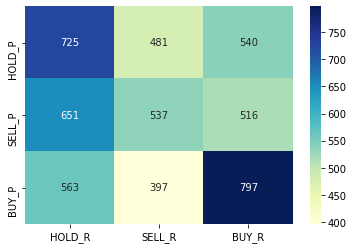

In [33]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['HOLD_R', 'SELL_R', 'BUY_R'], 
                        index=['HOLD_P', 'SELL_P', 'BUY_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [34]:
y_pred_train = model_lgbm.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9812


### Check for Overfitting

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lgbm.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_lgbm.score(x_test, y_test)))

Training set score: 0.9812
Test set score: 0.3954


In [36]:
print('Validation set score: {:.4f}'.format(model_lgbm.score(x_valid, y_valid)))

Validation set score: 0.3937


## Random Forest

In [37]:
model_randomF = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=15000)
model_randomF.fit(x_train, y_train)
predict_randomF = model_randomF.predict(x_test)

print('Accuracy Score - Random Forest: ', accuracy_score(y_test, predict_randomF))

Accuracy Score - Random Forest:  0.40195890147877855


In [38]:
print(classification_report(y_test, predict_randomF))

              precision    recall  f1-score   support

           0       0.37      0.34      0.36      1746
           1       0.39      0.36      0.37      1704
           2       0.43      0.50      0.47      1757

    accuracy                           0.40      5207
   macro avg       0.40      0.40      0.40      5207
weighted avg       0.40      0.40      0.40      5207



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_randomF)
confusion_matrix

array([[599, 541, 606],
       [540, 607, 557],
       [480, 390, 887]], dtype=int64)

In [40]:
print('Confusion matrix\n\n', confusion_matrix)
print('\nTrue Positives(TP) = ', confusion_matrix[0,0])
print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])
print('\nFalse Positives(FP) = ', confusion_matrix[0,1])
print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])

Confusion matrix

 [[599 541 606]
 [540 607 557]
 [480 390 887]]

True Positives(TP) =  599

True Negatives(TN) =  607

False Positives(FP) =  541

False Negatives(FN) =  540


<AxesSubplot:>

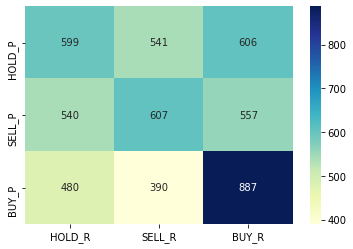

In [41]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['HOLD_R', 'SELL_R', 'BUY_R'], 
                        index=['HOLD_P', 'SELL_P', 'BUY_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [42]:
y_pred_train = model_randomF.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


### Check for Overfitting

In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_randomF.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_randomF.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.4020


In [44]:
print('Validation set score: {:.4f}'.format(model_randomF.score(x_valid, y_valid)))

Validation set score: 0.3855


# Deep Learning

In [197]:
# Encoding categorical data
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_train)
y_train2 = to_categorical(yy)

labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_test)
y_test2 = to_categorical(yy)

labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_valid)
y_valid2 = to_categorical(yy)

print(y_valid2[10:20])
print(y_valid[10:20])

# BUY | SELL | HOLD

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[2 0 1 2 2 2 2 0 2 1]


In [210]:
# example of training a final classification model
from keras.models import Sequential, load_model
from core.utils import Timer
from keras.layers import Dense, Dropout, LSTM, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, Adam
dim = x_train.shape[1]

# define and fit the final model
timer = Timer()
timer.start()

model = Sequential()

model.add(Dense(100, input_dim=dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[Model] Model Compiled')
print(model.summary())
timer.stop()


[Model] Model Compiled
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 100)               2600      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 75)                7575      
_________________________________________________________________
dropout_9 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 50)                3800      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_62 (Dense)             (

In [211]:
timer = Timer()
timer.start()
print('[Model] Training Started')

save_dir=configs['model']['save_dir']
my_model=configs['model']['model_name']
save_fname = os.path.join(save_dir, '%s.h5' % my_model)

batch_size=configs['training']['batch_size']

callbacks = [ ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)]

H = model.fit( x_train, y_train2, validation_data=(x_valid, y_valid2), epochs=100, 
               callbacks=callbacks, workers=1 )

model.save(save_fname)

print('[Model] Training Completed.')
print('Model saved as %s' % save_fname)

timer.stop()


[Model] Training Started
Train on 8229 samples, validate on 4265 samples
Epoch 1/100
8229/8229 [==============================] - 11s 1ms/step - loss: 1.1148 - accuracy: 0.3401 - val_loss: 1.0947 - val_accuracy: 0.3651 2s - loss: 1.1181  - ETA: 2s - - ETA: 0s - loss: 1.1160 - accuracy: 0. - ETA: 0s - loss: 1.1158 - accuracy - ETA: 0s - loss: 1.1154 - accuracy:  - ETA: 0s - loss: 1.1153 - ac
Epoch 2/100
8229/8229 [==============================] - 8s 1ms/step - loss: 1.0948 - accuracy: 0.3624 - val_loss: 1.0878 - val_accuracy: 0.40070s - loss: 1.0950 - accu
Epoch 3/100
8229/8229 [==============================] - 8s 986us/step - loss: 1.0904 - accuracy: 0.3830 - val_loss: 1.0818 - val_accuracy: 0.3991
Epoch 4/100
8229/8229 [==============================] - 9s 1ms/step - loss: 1.0847 - accuracy: 0.3878 - val_loss: 1.0779 - val_accuracy: 0.4070
Epoch 5/100
8229/8229 [==============================] - 9s 1ms/step - loss: 1.0801 - accuracy: 0.3913 - val_loss: 1.0778 - val_accuracy: 0.4009


8229/8229 [==============================] - 9s 1ms/step - loss: 1.0452 - accuracy: 0.4420 - val_loss: 1.0923 - val_accuracy: 0.4007 5s - loss: 1.0527 - accuracy: 0.42 - ETA: 5s - loss: - ETA: 4s - loss: 1.0452 -  - ETA: 3s - loss: 1.0490 - accuracy:  - ETA: 3s - loss: 1.0491 - ac - ETA: 3s - loss: 1.0488 -  - ETA: 3s - loss: 1.0495 - accuracy: 0. - ETA: 3s - loss: 1 - ETA: 2s - loss: 1
Epoch 43/100
8229/8229 [==============================] - 9s 1ms/step - loss: 1.0431 - accuracy: 0.4331 - val_loss: 1.0915 - val_accuracy: 0.3958oss: 1.0200 - accu - ETA: 8s - loss: 1.0 - ETA: 7s - loss: 1 - ETA: 7s - loss: 1.0298 - accuracy: 0.45 - ETA: 7s - loss: 1.0292 - 
Epoch 44/100
8229/8229 [==============================] - 8s 933us/step - loss: 1.0399 - accuracy: 0.4315 - val_loss: 1.0943 - val_accuracy: 0.3948
Epoch 45/100
8229/8229 [==============================] - 8s 934us/step - loss: 1.0438 - accuracy: 0.4371 - val_loss: 1.0894 - val_accuracy: 0.3894
Epoch 46/100
8229/8229 [==============

8229/8229 [==============================] - 11s 1ms/step - loss: 1.0118 - accuracy: 0.4651 - val_loss: 1.1096 - val_accuracy: 0.3894ss: 1.0096 -  - ETA: 3s - loss: 1.0096 - accuracy:  - ETA:  - ETA: 2s - l - ETA: 0s - loss: 1.0118 - accuracy
Epoch 81/100
8229/8229 [==============================] - 9s 1ms/step - loss: 1.0075 - accuracy: 0.4700 - val_loss: 1.1234 - val_accuracy: 0.3892145 - accu - ETA: 4s - ETA: 0s - loss: 1.0090 - 
Epoch 82/100
8229/8229 [==============================] - 10s 1ms/step - loss: 1.0110 - accuracy: 0.4749 - val_loss: 1.1088 - val_accuracy: 0.3890 5s - loss: 0.9964  - ETA: 3s - loss: 1.0039 - accura
Epoch 83/100
8229/8229 [==============================] - 9s 1ms/step - loss: 1.0089 - accuracy: 0.4598 - val_loss: 1.1203 - val_accuracy: 0.3873
Epoch 84/100
8229/8229 [==============================] - 6s 672us/step - loss: 1.0077 - accuracy: 0.4745 - val_loss: 1.1172 - val_accuracy: 0.3876
Epoch 85/100
8229/8229 [==============================] - 9s 1ms/step

In [212]:
# new instances where we do not know the answer
y_pred = model.predict(x_test) 
y_pred

array([[0.2363331 , 0.2266201 , 0.5370468 ],
       [0.23501754, 0.23782358, 0.52715886],
       [0.19938938, 0.3856911 , 0.41491947],
       ...,
       [0.33670357, 0.40564448, 0.25765198],
       [0.35665476, 0.34376195, 0.2995833 ],
       [0.3010731 , 0.44442138, 0.2545055 ]], dtype=float32)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


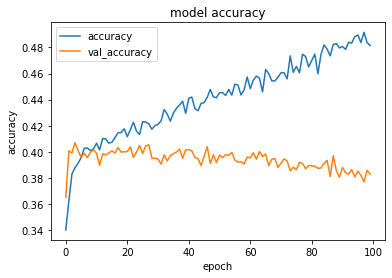

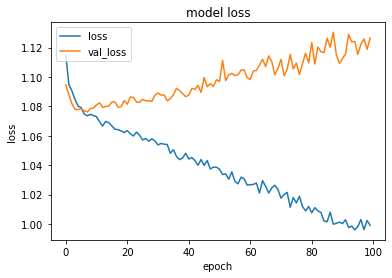

In [213]:
# list all data in history       
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
fig_path = 'accuracy_history.png'
plt.savefig(fig_path)     
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
fig_path = 'loss_history.png'
plt.savefig(fig_path) 
plt.show()

In [214]:
# BUY | SELL | HOLD

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_test2:
    real.append(np.argmax(i))
real_array = np.array(real)    

In [215]:
print(y_pred[10:20])
print(y_test2[10:20])

[[0.31971663 0.25658575 0.4236976 ]
 [0.3338744  0.2127491  0.4533765 ]
 [0.32118624 0.28809735 0.39071637]
 [0.31889853 0.33288422 0.34821725]
 [0.324888   0.48078144 0.19433053]
 [0.35204685 0.40898773 0.23896545]
 [0.3878112  0.37098977 0.24119906]
 [0.40860802 0.4149551  0.17643693]
 [0.3082205  0.35212842 0.33965108]
 [0.31958884 0.35896048 0.3214506 ]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [216]:
print(pred_array[10:20])
print(real_array[10:20])

[2 2 2 2 1 1 0 1 1 1]
[0 0 0 2 1 2 0 2 0 0]


In [217]:
print('Accuracy Score - DL: ', accuracy_score(real_array, pred_array))

Accuracy Score - DL:  0.39158824659112734


In [218]:
print(classification_report(real_array, pred_array))

              precision    recall  f1-score   support

           0       0.38      0.29      0.33      1746
           1       0.37      0.42      0.39      1704
           2       0.42      0.47      0.44      1757

    accuracy                           0.39      5207
   macro avg       0.39      0.39      0.39      5207
weighted avg       0.39      0.39      0.39      5207



In [219]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(real_array, pred_array)
confusion_matrix

array([[499, 657, 590],
       [445, 714, 545],
       [370, 561, 826]], dtype=int64)

<AxesSubplot:>

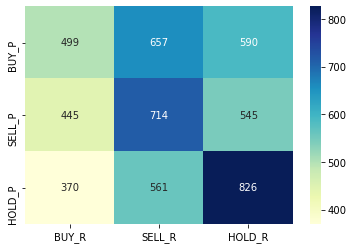

In [220]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_R', 'SELL_R', 'HOLD_R'], 
                        index=['BUY_P', 'SELL_P', 'HOLD_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [221]:
y_pred_train = model.predict(x_train)

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred_train:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_train2:
    real.append(np.argmax(i))
real_array = np.array(real)    

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(real_array, pred_array)))

Training-set accuracy score: 0.5379
